In [1]:
#-- リスト 8-1-(1)
from keras.datasets import mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

Using TensorFlow backend.


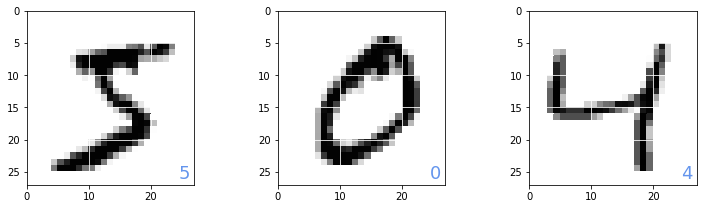

In [2]:
#-- リスト 8-1-(2)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.ﬁgure(1, ﬁgsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
for id in range(3):
    plt.subplot(1, 3, id + 1)
    #img = x_train[id, :, :].reshape(28, 28)
    img = x_train[id, :, :]
    plt.pcolor(255 - img)
    plt.text(24.5, 26, "%d" % y_train[id],
             color='cornflowerblue', fontsize=18)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.grid('on', color='white')
plt.show()

In [3]:
#-- リスト 8-1-(3)
from keras.utils import np_utils

x_train = x_train.reshape(60000, 784)  # (A)
x_train = x_train.astype('float32')   # (B)
x_train = x_train / 255               # (C)
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)  # (D)

x_test = x_test.reshape(10000, 784)
x_test = x_test.astype('float32')
x_test = x_test / 255
y_test = np_utils.to_categorical(y_test, num_classes)

In [4]:
#-- リスト 8-1-(4)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential() # (A)
model.add(Dense(16, input_dim=784, activation='sigmoid')) # (B)
model.add(Dense(10, activation='softmax')) # (C)
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy']) # (D)

In [5]:
#-- リスト 8-1-(5)
import time

startTime = time.time()
history = model.fit(x_train, y_train, epochs=10, batch_size=1000,
                    verbose=1, validation_data=(x_test, y_test))  # (A)
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s - loss: 2.0611 - acc: 0.2891 - val_loss: 1.7857 - val_acc: 0.5008
Epoch 2/10
60000/60000 [==============================] - 0s - loss: 1.6052 - acc: 0.6520 - val_loss: 1.4367 - val_acc: 0.7673
Epoch 3/10
60000/60000 [==============================] - 0s - loss: 1.3188 - acc: 0.7883 - val_loss: 1.1977 - val_acc: 0.8200
Epoch 4/10
60000/60000 [==============================] - 0s - loss: 1.1125 - acc: 0.8248 - val_loss: 1.0185 - val_acc: 0.8446
Epoch 5/10
60000/60000 [==============================] - 0s - loss: 0.9539 - acc: 0.8437 - val_loss: 0.8789 - val_acc: 0.8588
Epoch 6/10
60000/60000 [==============================] - 0s - loss: 0.8303 - acc: 0.8589 - val_loss: 0.7713 - val_acc: 0.8711
Epoch 7/10
60000/60000 [==============================] - 0s - loss: 0.7352 - acc: 0.8691 - val_loss: 0.6878 - val_acc: 0.8799
Epoch 8/10
60000/60000 [==============================] - 0s 

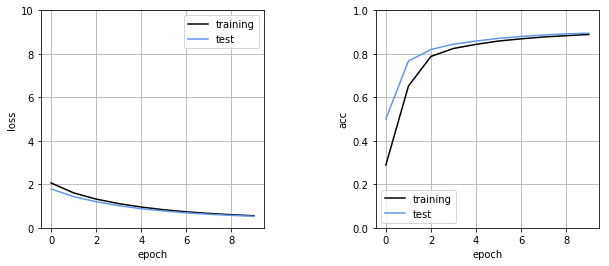

In [6]:
#-- リスト 8-1-(6)
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

plt.ﬁgure(1, ﬁgsize=(10, 4))
plt.subplots_adjust(wspace=0.5)

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='training', color='black')
plt.plot(history.history['val_loss'], label='test', 
color='cornflowerblue')
plt.ylim(0, 10)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['acc'], label='training', color='black')
plt.plot(history.history['val_acc'],label='test', color='cornflowerblue')
plt.ylim(0, 1)
plt.legend()
plt.grid()
plt.xlabel('epoch')
plt.ylabel('acc')
plt.show()

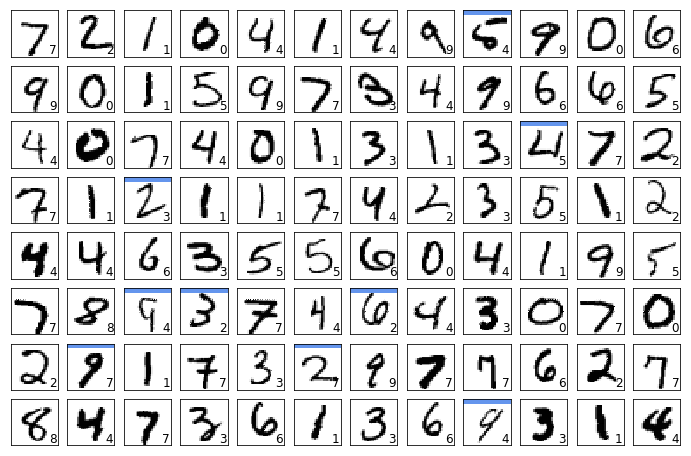

In [7]:
#-- リスト 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test)  # (A)
    plt.ﬁgure(2, ﬁgsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
# -- メイン
show_prediction()
plt.show()

In [8]:
#-- リスト 8-1-(8)
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import Adam

model = Sequential()
model.add(Dense(16, input_dim=784, activation='relu')) # (A)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(), metrics=['accuracy'])

startTime = time.time()
history = model.fit(x_train, y_train,  batch_size=1000, epochs=10,
                    verbose=1,  validation_data=(x_test, y_test)) 
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 0s - loss: 1.5427 - acc: 0.5440 - val_loss: 0.8999 - val_acc: 0.8070
Epoch 2/10
60000/60000 [==============================] - 0s - loss: 0.6686 - acc: 0.8452 - val_loss: 0.4984 - val_acc: 0.8776
Epoch 3/10
60000/60000 [==============================] - 0s - loss: 0.4511 - acc: 0.8827 - val_loss: 0.3896 - val_acc: 0.8999
Epoch 4/10
60000/60000 [==============================] - 0s - loss: 0.3750 - acc: 0.8987 - val_loss: 0.3394 - val_acc: 0.9104
Epoch 5/10
60000/60000 [==============================] - 0s - loss: 0.3350 - acc: 0.9077 - val_loss: 0.3102 - val_acc: 0.9167
Epoch 6/10
60000/60000 [==============================] - 0s - loss: 0.3092 - acc: 0.9134 - val_loss: 0.2918 - val_acc: 0.9204
Epoch 7/10
60000/60000 [==============================] - 0s - loss: 0.2910 - acc: 0.9178 - val_loss: 0.2760 - val_acc: 0.9224
Epoch 8/10
60000/60000 [==============================] - 0s 

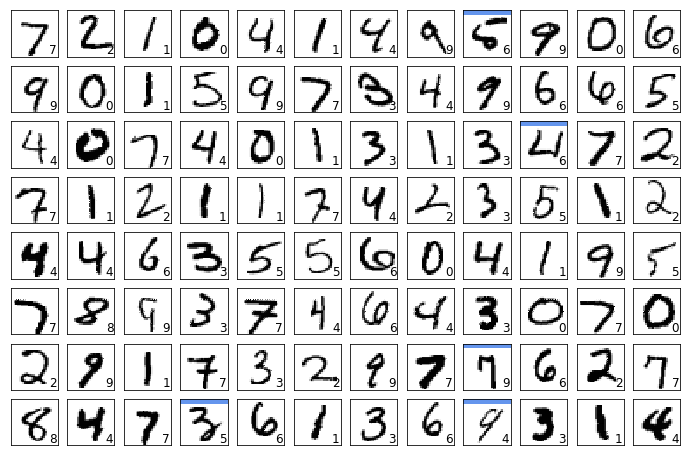

In [9]:
# リスト 8-1-(9)
show_prediction()
plt.show()

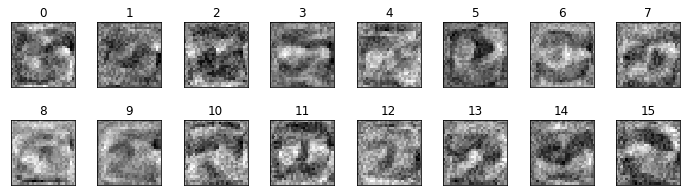

In [10]:
# -- リスト 8-1-(10)
# 1 層目の重みの視覚化
w = model.layers[0].get_weights()[0]
plt.ﬁgure(1, ﬁgsize=(12, 3))
plt.gray()
plt.subplots_adjust(wspace=0.35, hspace=0.5)
for i in range(16):
    plt.subplot(2, 8, i + 1)
    w1 = w[:, i]
    w1 = w1.reshape(28, 28)
    plt.pcolor(-w1)
    plt.xlim(0, 27)
    plt.ylim(27, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
plt.show()

In [11]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


In [12]:
#-- リスト 8-2-(1)
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(10000, 28, 28, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

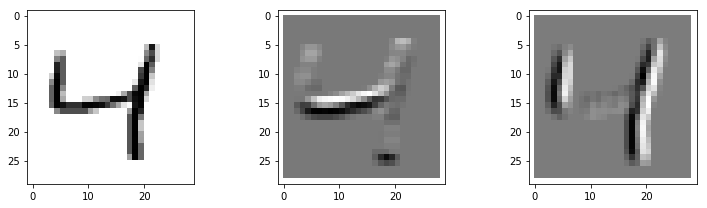

In [13]:
#-- リスト 8-2-(2)
import matplotlib.pyplot as plt
%matplotlib inline

id_img = 2
myﬁl1 = np.array([[1, 1, 1], 
                  [1, 1, 1],
                  [-2, -2, -2]], dtype=ﬂoat)  # (A)
myﬁl2 = np.array([[-2, 1, 1], 
                  [-2, 1, 1], 
                  [-2, 1, 1]], dtype=ﬂoat)  # (B)

x_img = x_train[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
out_img1 = np.zeros_like(x_img)
out_img2 = np.zeros_like(x_img)

# フィルター処理
for ih in range(img_h - 3):
    for iw in range(img_w - 3):
        img_part = x_img[ih:ih + 3, iw:iw + 3]
        out_img1[ih + 1, iw + 1] = \
             np.dot(img_part.reshape(-1), myﬁl1.reshape(-1))
        out_img2[ih + 1, iw + 1] = \
             np.dot(img_part.reshape(-1), myﬁl2.reshape(-1))
            
#-- 表示
plt.ﬁgure(1, ﬁgsize=(12, 3.2))
plt.subplots_adjust(wspace=0.5)
plt.gray()
plt.subplot(1, 3, 1)
plt.pcolor(1 - x_img)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 2)
plt.pcolor(-out_img1)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.subplot(1, 3, 3)
plt.pcolor(-out_img2)
plt.xlim(-1, 29)
plt.ylim(29, -1)
plt.show()

In [14]:
#-- リスト 8-2-(3)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(8, (3, 3), padding='same',
           input_shape=(28, 28, 1), activation='relu'))  # (A)
model.add(Flatten())                                    # (B)
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])
startTime = time.time()
history = model.fit(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s - loss: 0.7696 - acc: 0.8154 - val_loss: 0.3388 - val_acc: 0.9044
Epoch 2/20
60000/60000 [==============================] - 7s - loss: 0.3161 - acc: 0.9093 - val_loss: 0.2741 - val_acc: 0.9216
Epoch 3/20
60000/60000 [==============================] - 7s - loss: 0.2648 - acc: 0.9255 - val_loss: 0.2408 - val_acc: 0.9342
Epoch 4/20
60000/60000 [==============================] - 7s - loss: 0.2299 - acc: 0.9354 - val_loss: 0.2120 - val_acc: 0.9426
Epoch 5/20
60000/60000 [==============================] - 7s - loss: 0.2019 - acc: 0.9441 - val_loss: 0.1900 - val_acc: 0.9485
Epoch 6/20
60000/60000 [==============================] - 7s - loss: 0.1807 - acc: 0.9501 - val_loss: 0.1711 - val_acc: 0.9540
Epoch 7/20
60000/60000 [==============================] - 7s - loss: 0.1620 - acc: 0.9556 - val_loss: 0.1580 - val_acc: 0.9581
Epoch 8/20
60000/60000 [==============================] - 7s 

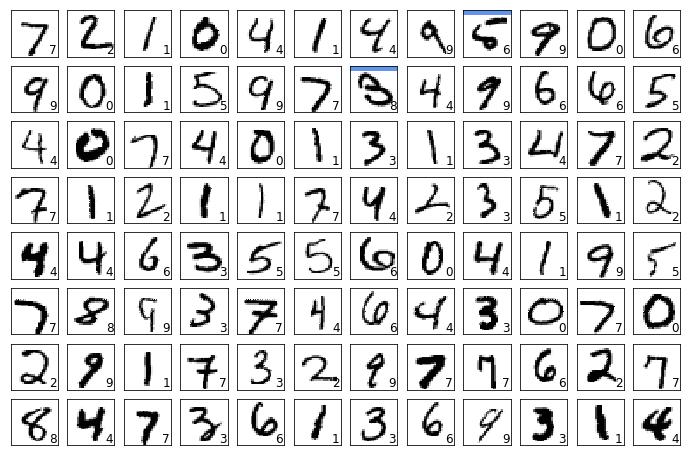

In [18]:
#-- リスト 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test)  # (A)
    plt.ﬁgure(2, ﬁgsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")
#-- リスト 8-2-(4)
show_prediction()
plt.show()

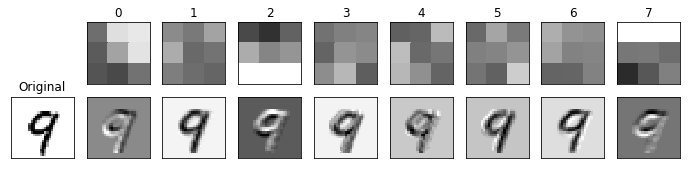

In [21]:
#-- リスト 8-2-(5)
plt.ﬁgure(1, ﬁgsize=(12, 2.5))
plt.gray()
plt.subplots_adjust(wspace=0.2, hspace=0.2)
plt.subplot(2, 9, 10)
id_img = 12
x_img = x_test[id_img, :, :, 0]
img_h = 28
img_w = 28
x_img = x_img.reshape(img_h, img_w)
plt.pcolor(-x_img)
plt.xlim(0, img_h)
plt.ylim(img_w, 0)
plt.xticks([], "")
plt.yticks([], "")

plt.title("Original")
w = model.layers[0].get_weights()[0]  # (A)
max_w = np.max(w)
min_w = np.min(w)
for i in range(8):
    plt.subplot(2, 9, i + 2)
    w1 = w[:, :, 0, i]
    w1 = w1.reshape(3, 3)
    plt.pcolor(-w1, vmin=min_w, vmax=max_w)
    plt.xlim(0, 3)
    plt.ylim(3, 0)
    plt.xticks([], "")
    plt.yticks([], "")
    plt.title("%d" % i)
    plt.subplot(2, 9, i + 11)
    out_img = np.zeros_like(x_img)
    # フィルター処理
    for ih in range(img_h - 3):
        for iw in range(img_w - 3):
            img_part = x_img[ih:ih + 3, iw:iw + 3]
            out_img[ih + 1, iw + 1] = \
                        np.dot(img_part.reshape(-1), w1.reshape(-1))
    plt.pcolor(-out_img)
    plt.xlim(0, img_w)
    plt.ylim(img_h, 0)
    plt.xticks([], "")
    plt.yticks([], "")
plt.show()

In [22]:
#-- リスト 8-2-(6)
import numpy as np
np.random.seed(1)
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import Adam
import time

model = Sequential()
model.add(Conv2D(16, (3, 3), 
          input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                # (A)
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))                # (B)
model.add(Dropout(0.25))                                   # (C)
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))                                  # (D)
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=Adam(),
              metrics=['accuracy'])

startTime = time.time()

history = model.ﬁt(x_train, y_train, batch_size=1000, epochs=20,
                    verbose=1, validation_data=(x_test, y_test))

score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])
print("Computation time:{0:.3f} sec".format(time.time() - startTime))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 66s - loss: 0.6225 - acc: 0.8084 - val_loss: 0.1165 - val_acc: 0.9643
Epoch 2/20
60000/60000 [==============================] - 68s - loss: 0.1301 - acc: 0.9612 - val_loss: 0.0622 - val_acc: 0.9801
Epoch 3/20
60000/60000 [==============================] - 69s - loss: 0.0867 - acc: 0.9738 - val_loss: 0.0478 - val_acc: 0.9853
Epoch 4/20
60000/60000 [==============================] - 70s - loss: 0.0685 - acc: 0.9784 - val_loss: 0.0383 - val_acc: 0.9882
Epoch 5/20
60000/60000 [==============================] - 68s - loss: 0.0568 - acc: 0.9829 - val_loss: 0.0319 - val_acc: 0.9891
Epoch 6/20
60000/60000 [==============================] - 69s - loss: 0.0501 - acc: 0.9844 - val_loss: 0.0294 - val_acc: 0.9901
Epoch 7/20
60000/60000 [==============================] - 64s - loss: 0.0457 - acc: 0.9857 - val_loss: 0.0296 - val_acc: 0.9901
Epoch 8/20
60000/60000 [==============================

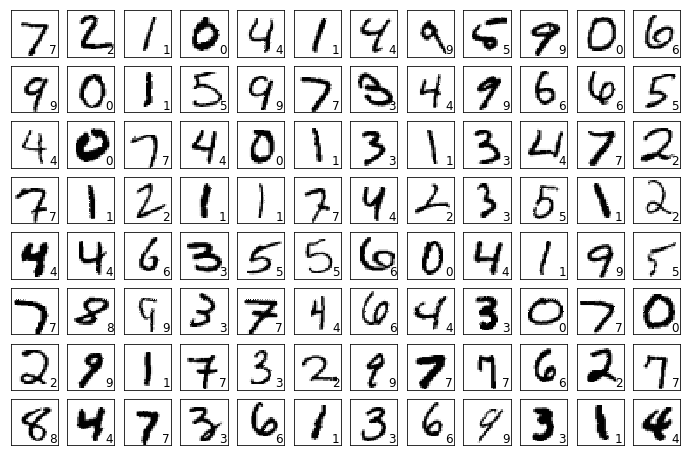

In [23]:
#-- リスト 8-1-(7)
def show_prediction():
    n_show = 96
    y = model.predict(x_test)  # (A)
    plt.ﬁgure(2, ﬁgsize=(12, 8))
    plt.gray()
    for i in range(n_show):
        plt.subplot(8, 12, i + 1)
        x = x_test[i, :]
        x = x.reshape(28, 28)
        plt.pcolor(1 - x)
        wk = y[i, :]
        prediction = np.argmax(wk)
        plt.text(22, 25.5, "%d" % prediction, fontsize=12)
        if prediction != np.argmax(y_test[i, :]):
            plt.plot([0, 27], [1, 1], color='cornflowerblue', linewidth=5)
        plt.xlim(0, 27)
        plt.ylim(27, 0)
        plt.xticks([], "")
        plt.yticks([], "")]

# リスト 8-2-(7)
show_prediction()
plt.show()